### Project 2

#### MLP trained on Dataset 1 with regularization techniques

In [1]:
#Importing essential libraries
from sklearn.datasets import fetch_openml

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os 
import cv2
import random 
import math
import pandas as pd

from datetime import datetime

from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D,Conv2D,MaxPooling1D,Flatten,Dense,Dropout,BatchNormalization, GRU, LSTM, RNN
from tensorflow.keras import regularizers as reg

import tensorflow as tf
from tensorflow import keras
import pickle

In [2]:
pickle_in = open("X_train_T1.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("y_train_T1.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("X_test_T1.pickle","rb")
X_test = pickle.load(pickle_in)


In [3]:
print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test :', X_test.shape)

X_train : (4431, 441)
y_train : (4431,)
X_test : (4520, 441)


In [5]:
X_train[:]

sensor_1_sum  sensor_1_mean  sensor_1_std   sensor_1_var  \
segment_id                                                             
1136037770      -96621.0      -1.610323    303.096099   91867.245099   
1969647810       85569.0       1.426126    438.360560  192159.980413   
1895879680      150278.0       2.504592    241.575415   58358.681050   
2068207140      129950.0       2.165797    221.967825   49269.715377   
192955606         4429.0       0.073815    261.695935   68484.762635   
...                  ...            ...           ...            ...   
873340274        54405.0       0.906735    613.427301  376293.054135   
1297437712      476221.0       7.936884    649.089618  421317.332733   
694853998        85261.0       1.420993    110.942596   12308.259562   
1886987043       54350.0       0.905818    478.852581  229299.794013   
1100632800     -248575.0      -4.142848    272.632730   74328.605478   

            sensor_1_max  sensor_1_min  sensor_1_median  sensor_1_skew  \
segment_id                                                               
1136037770        1353.0       -1421.0              0.0      -0.057494   
1969647810        2197.0       -2005.0              0.0      -0.001189   
1895879680        1148.0       -1115.0              0.0       0.071632   
2068207140        1254.0       -1025.0              0.0       0.123639   
192955606         1114.0       -1190.0              0.0       0.006594   
...                  ...           ...              ...            ...   
873340274         2916.0       -2610.0              0.0      -0.003413   
1297437712        4498.0       -3654.0              0.0       0.113867   
694853998          557.0        -753.0              0.0      -0.060527   
1886987043        3938.0       -3555.0              0.0       0.028062   
1100632800        2063.0       -1404.0              0.0       0.022485   

            sensor_1_mad  sensor_1_kurtosis  ...  sensor_10_fft_real_median  \
segment_id                                   ...                              
1136037770    238.836278           0.247736  ...                 383.981464   
1969647810    334.894305           1.177624  ...                 122.448931   
1895879680    189.198970           0.567813  ...                 139.338402   
2068207140    171.285870           1.079660  ...                 -47.376444   
192955606     205.913478           0.274037  ...                 157.846818   
...                  ...                ...  ...                        ...   
873340274     487.948374           0.168746  ...                -867.393367   
1297437712    508.895214           0.695682  ...                 803.989124   
694853998      86.101013           1.005580  ...                -163.463548   
1886987043    359.875923           2.278329  ...                 -50.159215   
1100632800    211.399086           1.326928  ...                 129.164339   

            sensor_10_fft_real_skew  sensor_10_fft_real_kurtosis  \
segment_id                                                         
1136037770                -3.691093                   400.282146   
1969647810                 0.555212                    54.561405   
1895879680                -1.351932                    87.429275   
2068207140                 0.238320                    67.970726   
192955606                 -0.469491                    40.417556   
...                             ...                          ...   
873340274                  0.732382                    84.940470   
1297437712                -0.206159                    35.867929   
694853998                 -0.618217                    35.455675   
1886987043                 0.448246                    38.864099   
1100632800                -7.790700                   708.948633   

            sensor_10_fft_imag_mean  sensor_10_fft_imag_std  \
segment_id                                                    
1136037770            -2.793921e-13           102524.406272   
1969647810

In [6]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(4431, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(625,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
NN_model.add(Dense(256,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))
NN_model.add(Dense(100,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='relu'))

# The Output Layer :
NN_model.add(Dense(1,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01),activation='linear'))

# Compile the network :
#sgd = SGD(learning_rate=0.001)
opt = keras.optimizers.Adam(learning_rate=0.001)
NN_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mean_absolute_error'])
NN_model.summary()
early_stopping_monitor = EarlyStopping(patience=10)
callbacks_list = [early_stopping_monitor]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4431)              1958502   
_________________________________________________________________
dense_1 (Dense)              (None, 625)               2770000   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               160256    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 4,914,559
Trainable params: 4,914,559
Non-trainable params: 0
_________________________________________________________________


In [7]:
NN_model.fit(X_train, y_train, epochs=250, batch_size=1, validation_split = 0.05 , callbacks=callbacks_list )

Epoch 1/250
4209/4209 [==============================] - 162s 39ms/step - loss: 15316760.0000 - mean_absolute_error: 15316722.0000 - val_loss: 10352724.0000 - val_mean_absolute_error: 10352617.0000
Epoch 2/250
4209/4209 [==============================] - 162s 39ms/step - loss: 11096638.0000 - mean_absolute_error: 11096481.0000 - val_loss: 9299965.0000 - val_mean_absolute_error: 9299779.0000
Epoch 3/250
4209/4209 [==============================] - 157s 37ms/step - loss: 9728777.0000 - mean_absolute_error: 9728547.0000 - val_loss: 10193712.0000 - val_mean_absolute_error: 10193465.0000
Epoch 4/250
4209/4209 [==============================] - 152s 36ms/step - loss: 8936317.0000 - mean_absolute_error: 8936058.0000 - val_loss: 8153008.0000 - val_mean_absolute_error: 8152719.0000
Epoch 5/250
4209/4209 [==============================] - 153s 36ms/step - loss: 8698140.0000 - mean_absolute_error: 8697818.0000 - val_loss: 10576881.0000 - val_mean_absolute_error: 10576555.0000
Epoch 6/250
4209/420

4209/4209 [==============================] - 151s 36ms/step - loss: 4504737.5000 - mean_absolute_error: 4503650.5000 - val_loss: 6037100.5000 - val_mean_absolute_error: 6036011.0000
Epoch 44/250
4209/4209 [==============================] - 151s 36ms/step - loss: 4576104.0000 - mean_absolute_error: 4575008.5000 - val_loss: 5572895.5000 - val_mean_absolute_error: 5571791.0000
Epoch 45/250
4209/4209 [==============================] - 151s 36ms/step - loss: 4580167.0000 - mean_absolute_error: 4579050.5000 - val_loss: 5351388.5000 - val_mean_absolute_error: 5350268.0000


In [8]:
def plotfig (ypred, yactual, strtitle, y_max):
    plt.scatter(ypred, yactual.values.ravel())
    plt.title(strtitle)
    plt.plot([(0, 0), (y_max, y_max)], [(0, 0), (y_max, y_max)])
    plt.xlim(0, y_max)
    plt.ylim(0, y_max)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.show()

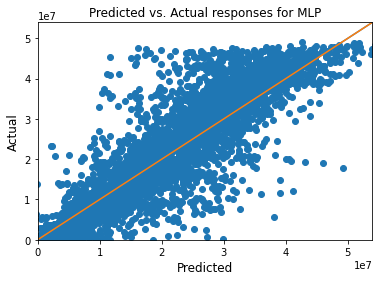

In [9]:
plotfig(NN_model.predict(X_train), y_train, 'Predicted vs. Actual responses for MLP', max(y_train) + 0.1*max(y_train))

In [15]:
predictions = NN_model.predict(X_test)
print(predictions)

[[14729648. ]
 [33568692. ]
 [21653126. ]
 ...
 [ 8327138.5]
 [39454028. ]
 [27739502. ]]


In [16]:
predictions.shape

(4520, 1)

In [17]:
submission = pd.DataFrame()
submission['segment_id'] = X_test.index
submission['time_to_eruption'] = predictions
submission.to_csv('submission_MLP3_121220.csv', header=True, index=False)